In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')
sns.set(palette='terrain')

In [81]:
df = pd.read_csv('sc_stats.csv')
df.drop('mp', axis=1, inplace=True)
df.head()

,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,pf,tov,pts,plus_minus
0,7,12,0.583,0,1,0.000,0,0,NaN,1,1,2,7,4,0,2,2,14,7
1,5,9,0.556,2,3,0.667,0,0,NaN,0,2,2,4,1,0,5,3,12,-19
2,3,6,0.500,1,2,0.500,0,0,NaN,0,5,5,9,2,0,4,1,7,-4
3,1,5,0.200,0,1,0.000,3,4,0.75,0,1,1,3,0,0,6,0,5,-13
4,4,8,0.500,1,2,0.500,0,2,0.00,1,3,4,6,0,0,4,5,9,-5


In [82]:
df = df.fillna(0)

In [83]:
df.nunique()

fg             21
fga            33
fg_pct        115
fg3            14
fg3a           21
fg3_pct        65
ft             16
fta            16
ft_pct         24
orb             6
drb            14
trb            14
ast            17
stl             8
blk             3
pf              7
tov            12
pts            52
plus_minus     71
dtype: int64

In [84]:
df.isna().sum(axis=0)

fg            0
fga           0
fg_pct        0
fg3           0
fg3a          0
fg3_pct       0
ft            0
fta           0
ft_pct        0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
pf            0
tov           0
pts           0
plus_minus    0
dtype: int64

In [85]:
df_neg_pm = df[df['plus_minus'] <= 0]
df_pos_pm = df[df['plus_minus'] > 0]

In [86]:
offense = (df_neg_pm.select_dtypes(exclude='object').columns).tolist()
offense.remove('drb')
offense.remove('trb')
offense.remove('orb')
offense.remove('stl')
offense.remove('blk')
offense.remove('pf')

# These statistics are repetitive. I will use their 'made' versions of the respective statistics.
# fg3a, I will be using fg3 representing the number of 3 pointers Stephen Curry made in that game.
# fgta, I will be using ft representing the number of free throws Stephen Curry made in that game. 

offense.remove('fg3a')
offense.remove('fta')
offense.remove('plus_minus')

defense = ['stl', 'blk', 'pf', 'tov']
rebounds = ['orb', 'drb', 'trb']

In [87]:
offense, defense, rebounds

(['fg',
  'fga',
  'fg_pct',
  'fg3',
  'fg3_pct',
  'ft',
  'ft_pct',
  'ast',
  'tov',
  'pts'],
 ['stl', 'blk', 'pf', 'tov'],
 ['orb', 'drb', 'trb'])

# Offensive Feature Analysis

In [88]:
print(offense[:len(offense) // 2])
print(offense[len(offense) // 2:])

['fg', 'fga', 'fg_pct', 'fg3', 'fg3_pct']
['ft', 'ft_pct', 'ast', 'tov', 'pts']


In [89]:
fontsize = 12.5
half = len(offense) // 2
width = 20
height = 35

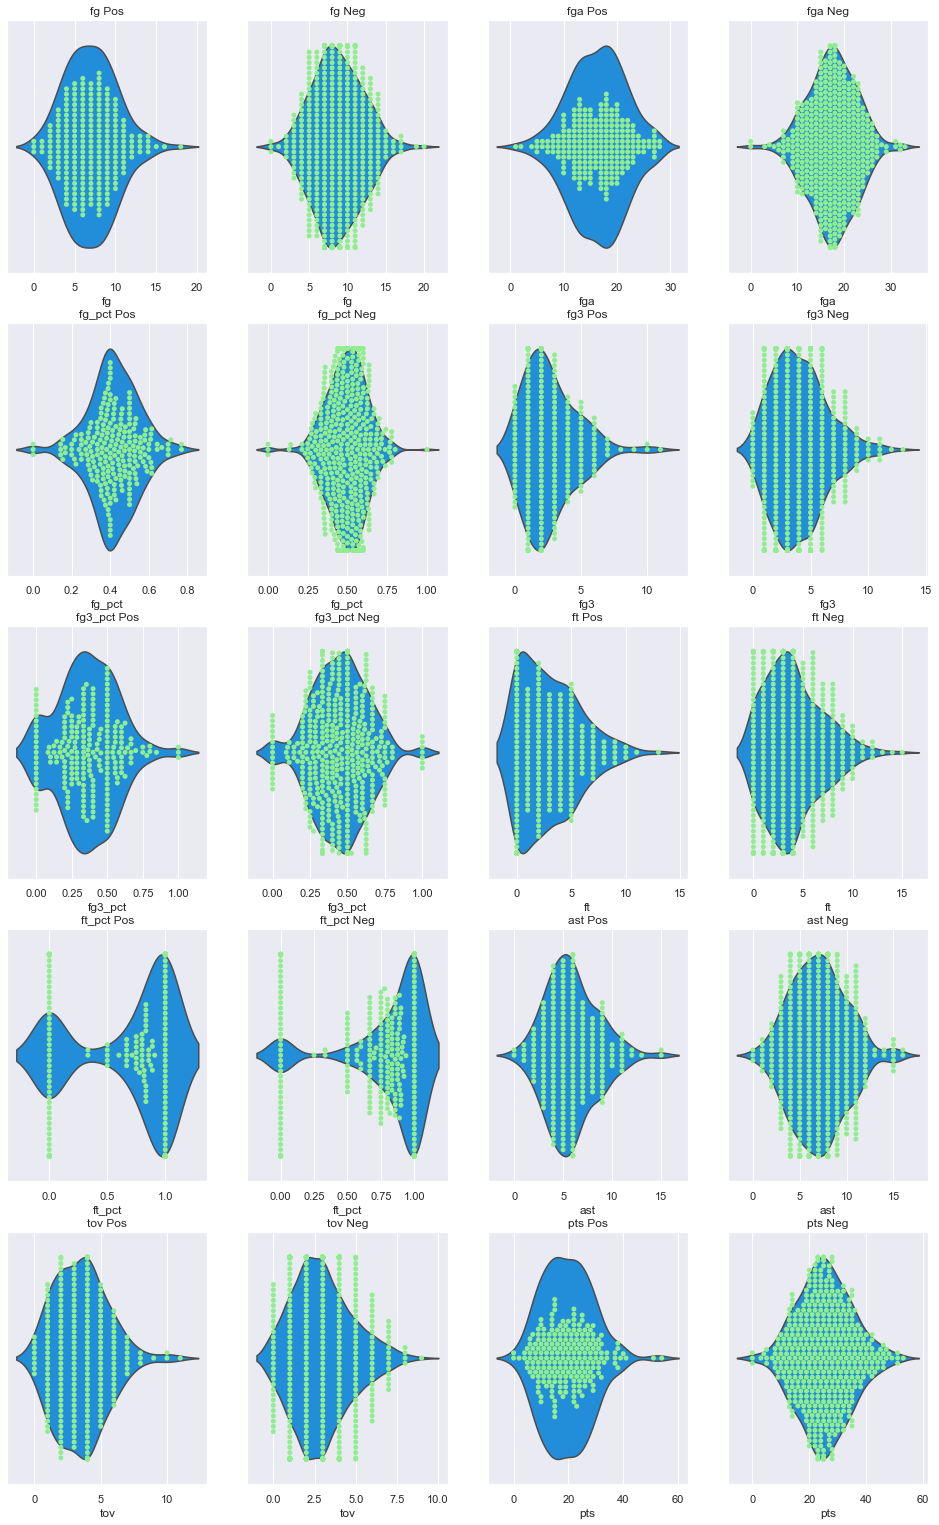

In [113]:
fig = plt.figure(1, figsize=(width, height))
i = 0

for col in offense:
    i += 1
    ax1 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.violinplot(x=df_neg_pm[col], inner=None)
    sns.swarmplot(df_neg_pm[col], color='lightgreen')
    ax1.set_title(f'{col} Pos')
    
    i += 1
    ax2 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.violinplot(x=df_pos_pm[col], inner=None)
    sns.swarmplot(df_pos_pm[col], color='lightgreen')
    ax2.set_title(f'{col} Neg')

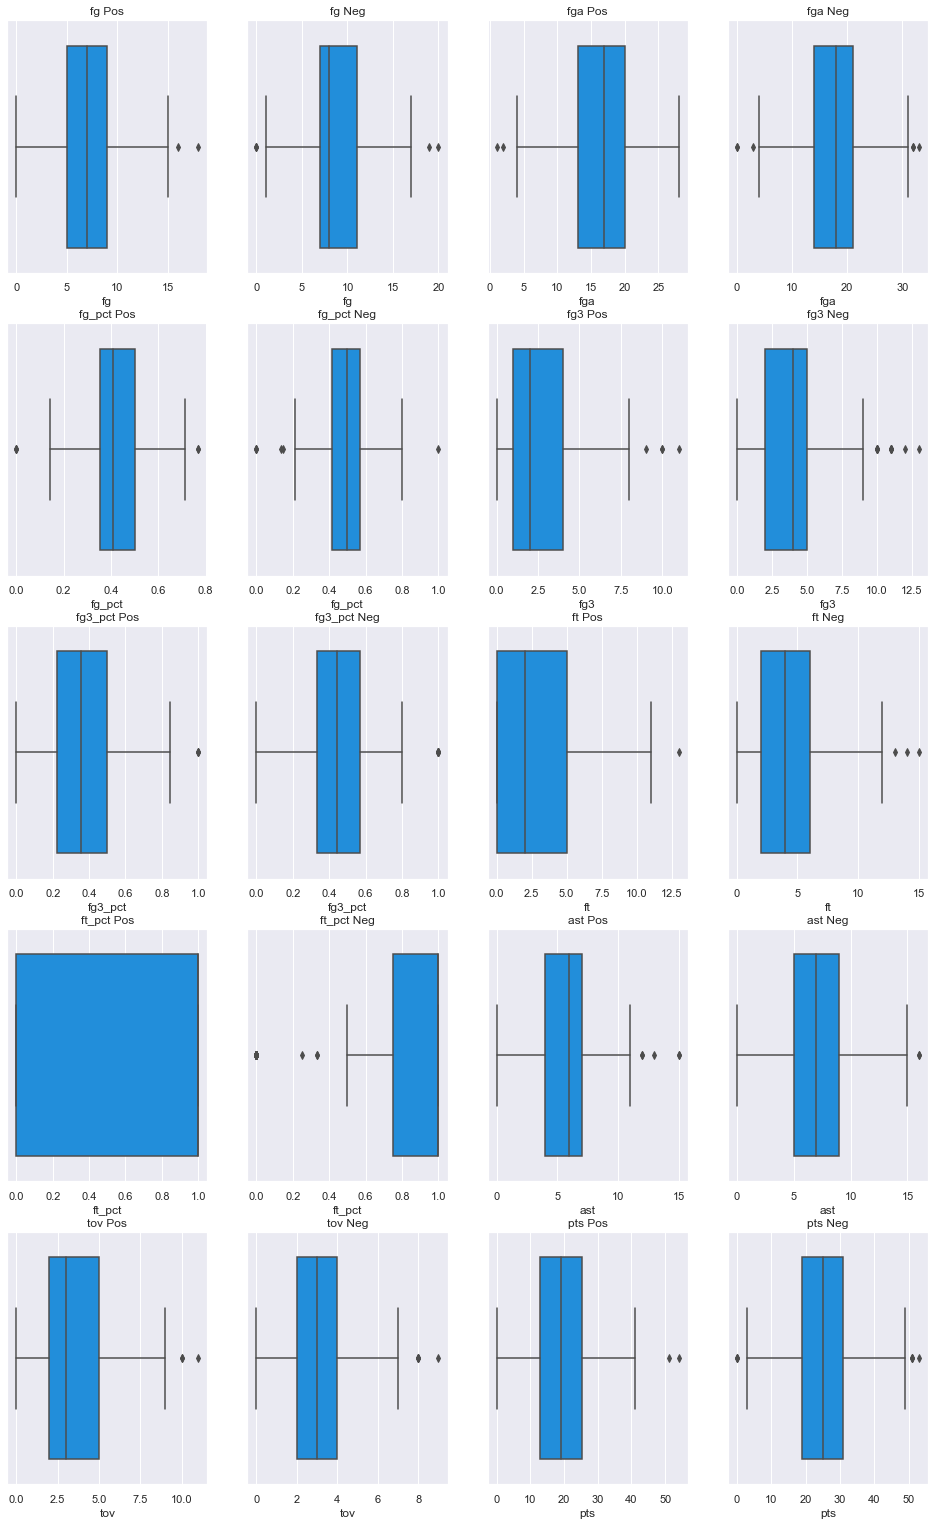

In [106]:
height = 32.5

fig = plt.figure(1, figsize=(width, height))
i = 0

for col in offense:
    i += 1
    ax1 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.boxplot(x=df_neg_pm[col])
    ax1.set_title(f'{col} Pos')
    
    i += 1
    ax2 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.boxplot(x=df_pos_pm[col])
    ax2.set_title(f'{col} Neg')

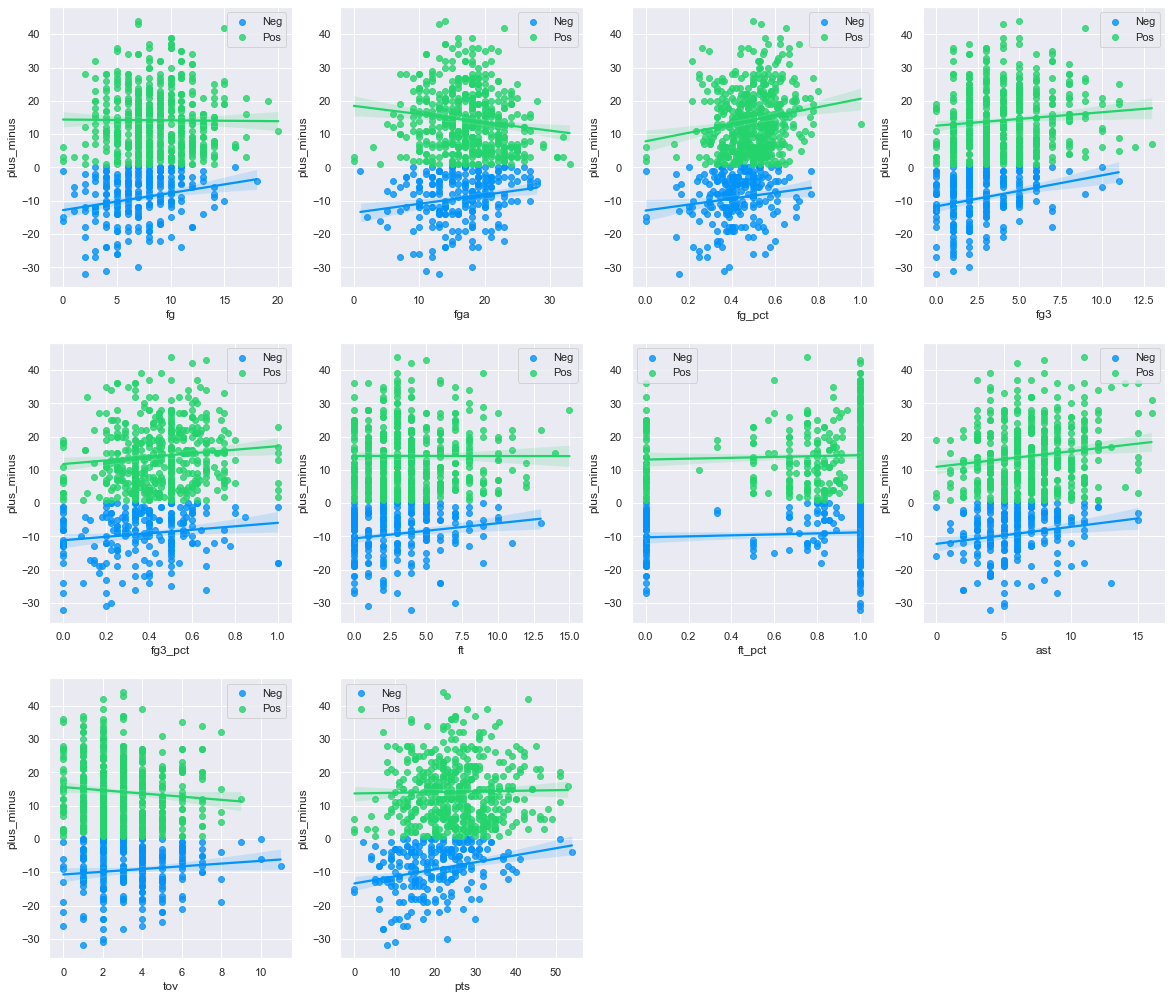

In [92]:
height = 17.5

fig = plt.figure(1, figsize=(width, height))
i = 0
rows = (len(offense) // 4) + 1

for col in offense:
    i += 1
    ax1 = plt.subplot(rows, 4, i)
    
    sns.regplot(df_neg_pm[col], df_neg_pm['plus_minus'], label='Neg') 
    sns.regplot(df_pos_pm[col], df_pos_pm['plus_minus'], label='Pos') 
    
    ax1.legend()

In [ ]:
df_neg_pm['ast_tov_ratio'] = df_neg_pm['ast'].div(df_neg_pm['tov'].replace(0, np.inf))
df_pos_pm['ast_tov_ratio'] = df_pos_pm['ast'].div(df_pos_pm['tov'].replace(0, np.inf))

In [ ]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['ast_tov_ratio'], df_neg_pm['plus_minus'], label='Pos')
sns.regplot(df_pos_pm['ast_tov_ratio'], df_pos_pm['plus_minus'], label='Neg')

ax.legend()

In [107]:
df_neg_pm['3/fg'] = df_neg_pm['fg3'].div(df_neg_pm['fg'].replace(0, np.inf))
df_neg_pm['2/fg'] = (df_neg_pm['fg'] - df_neg_pm['fg3']).div(df_neg_pm['fg'].replace(0, np.inf))

df_pos_pm['3/fg'] = df_pos_pm['fg3'].div(df_pos_pm['fg'].replace(0, np.inf))
df_pos_pm['2/fg'] = (df_pos_pm['fg'] - df_pos_pm['fg3']).div(df_pos_pm['fg'].replace(0, np.inf))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

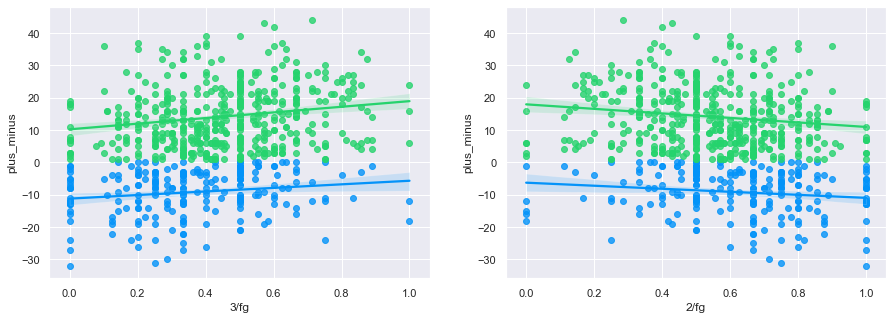

In [111]:
fig = plt.figure(1, figsize=(15, 5))
ax = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['3/fg'], df_neg_pm['plus_minus'])
sns.regplot(df_pos_pm['3/fg'], df_pos_pm['plus_minus'])

ax = plt.subplot(1, 2, 2)

sns.regplot(df_neg_pm['2/fg'], df_neg_pm['plus_minus'])
sns.regplot(df_pos_pm['2/fg'], df_pos_pm['plus_minus'])

# Defensive Features Analysis

In [93]:
width = 16.5
height = 21.5

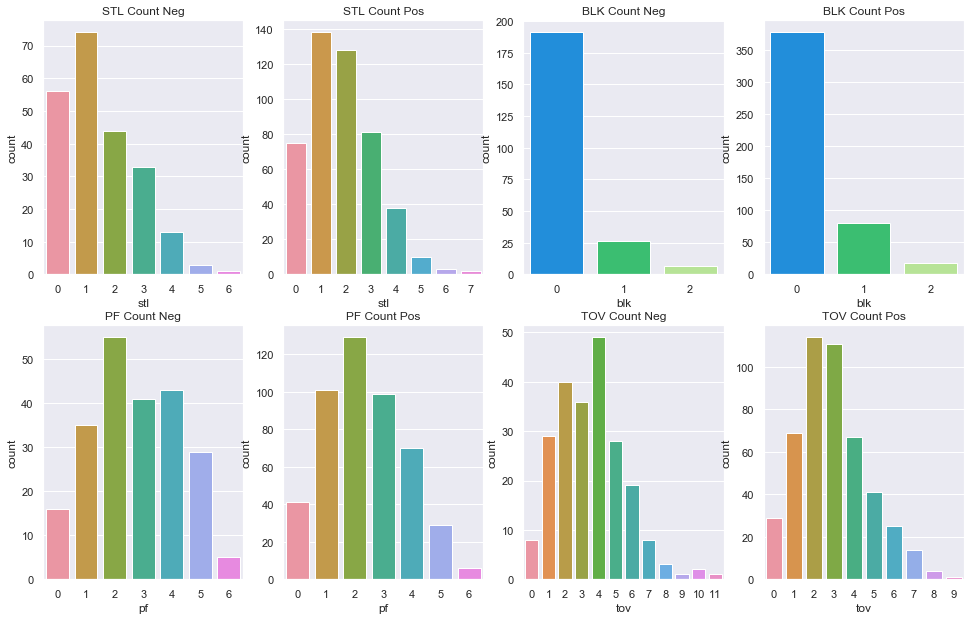

In [94]:
fig = plt.figure(1, figsize=(width, height))
i = 0

for col in defense:
    i += 1
    ax1 = plt.subplot(len(defense), 4, i)
    sns.countplot(df_neg_pm[col]) 
    ax1.set_title(f'{col.upper()} Count Neg')
    
    i += 1
    ax2 = plt.subplot(len(defense), 4, i)
    sns.countplot(df_pos_pm[col]) 
    ax2.set_title(f'{col.upper()} Count Pos')

In [97]:
df_neg_pm['stl_per_f'] = df_neg_pm['stl'] / df_neg_pm['pf']
df_pos_pm['stl_per_f'] = df_pos_pm['stl'] / df_pos_pm['pf']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/usr/local/lib/python3.7/site-packages/numpy/core/function_base.py:159: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.7/site-packages/numpy/linalg/linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


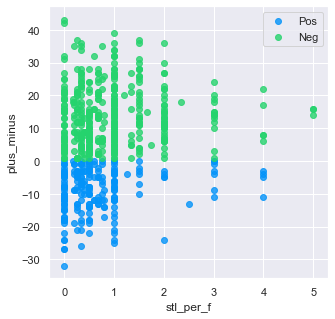

In [98]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['stl_per_f'], df_neg_pm['plus_minus'], label='Pos')
sns.regplot(df_pos_pm['stl_per_f'], df_pos_pm['plus_minus'], label='Neg')

ax.legend()

In [99]:
df_neg_pm['blk_per_f'] = df_neg_pm['blk'] / df_neg_pm['pf']
df_pos_pm['blk_per_f'] = df_pos_pm['blk'] / df_pos_pm['pf']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


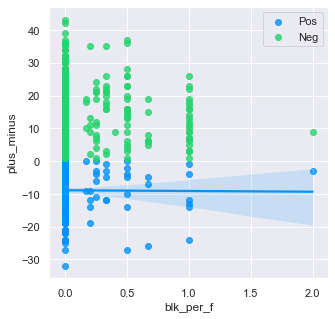

In [100]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['blk_per_f'], df_neg_pm['plus_minus'], label='Pos')
sns.regplot(df_pos_pm['blk_per_f'], df_pos_pm['plus_minus'], label='Neg')

ax.legend()

# Rebounds

In [101]:
df_neg_pm['orb_trb_ratio'] = df_neg_pm['orb'] / df_neg_pm['trb']
df_pos_pm['orb_trb_ratio'] = df_pos_pm['orb'] / df_pos_pm['trb']

df_neg_pm['drb_trb_ratio'] = df_neg_pm['drb'] / df_neg_pm['trb']
df_pos_pm['drb_trb_ratio'] = df_pos_pm['drb'] / df_pos_pm['trb']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

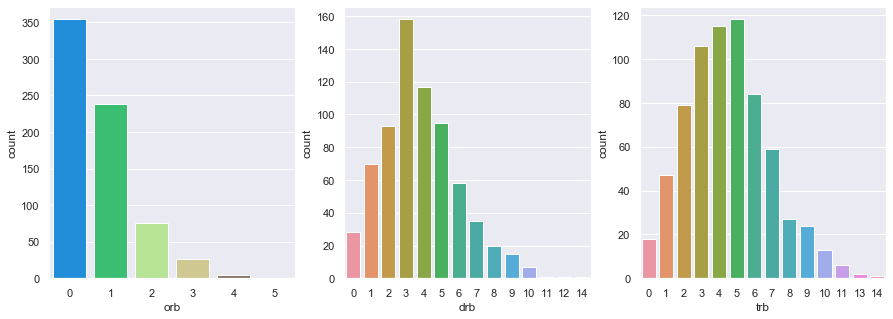

In [102]:
fig = plt.figure(1, figsize=(15, 5))
i = 0

for rebound_type in rebounds:
    i += 1
    ax = plt.subplot(1, 3, i)
    sns.countplot(df[rebound_type])

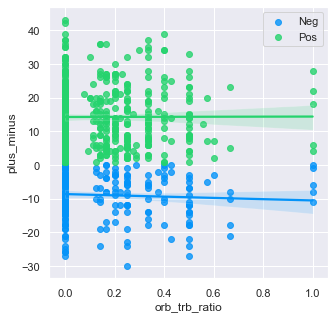

In [103]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['orb_trb_ratio'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['orb_trb_ratio'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

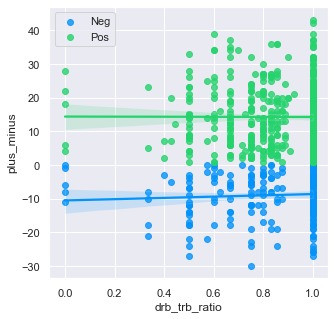

In [104]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['drb_trb_ratio'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['drb_trb_ratio'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

# Plus Minus Data Correlation Analysis

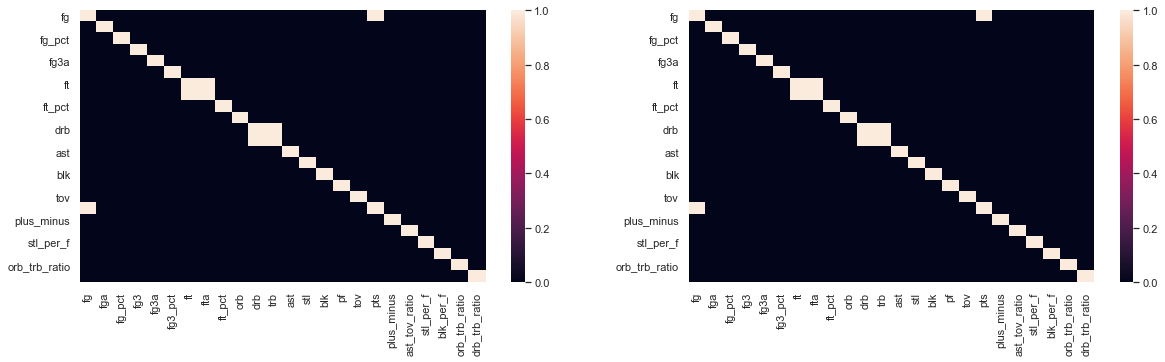

In [105]:
fig = plt.figure(figsize=(20, 5))
corr_cutoff = 0.9

ax = plt.subplot(1, 2, 1)
sns.heatmap(df_neg_pm.corr() > corr_cutoff)

ax = plt.subplot(1, 2, 2)
sns.heatmap(df_pos_pm.corr() > corr_cutoff)